In [1]:
import numpy as np 
import anonfair
import os
from anonfair.utils import group_metrics as gm
from matplotlib import pyplot as plt
#Helper functions.
def sigmoid(array):
    return np.stack ((1/(1+np.exp(array[:,0])),1/(1+np.exp(-array[:,0]))),1)
def square_align(array):
    return np.stack((array[:,1],1-array[:,1]),1)



In [3]:
expdir = "training_nlp_jigsaw_religion/output/data=jigsawreligion,mfair=[christian,other,muslim]"

val = np.load(os.path.join(expdir, 'outputs_val.npy'))
val_target = np.load(os.path.join(expdir, 'target_label_val.npy'))
val_groups = np.load(os.path.join(expdir, 'protected_label_val.npy'))

test = np.load(os.path.join(expdir, 'outputs_test.npy'))
test_target = np.load(os.path.join(expdir, 'target_label_test.npy'))
test_groups = np.load(os.path.join(expdir, 'protected_label_test.npy'))

val_dict={'data':val, 'target':val_target, 'groups':val_groups}
test_dict={'data':test,'target':test_target,'groups':test_groups}

val_dict={'data':val, 'target':val_target, 'groups':val_groups}
test_dict={'data':test,'target':test_target,'groups':test_groups}

In [4]:
fpred=anonfair.DeepFairPredictor(val_target,val,val_groups,use_fast='hybrid', use_actual_groups = False)
fpred.fit(gm.accuracy,gm.equal_opportunity,0.05)
fpred.evaluate(test_dict)

,original,updated
Accuracy,0.709878,0.887488
Balanced Accuracy,0.739778,0.589080
F1 score,0.395768,0.296471
MCC,0.327244,0.304862
Precision,0.265231,0.623762
Recall,0.779321,0.194444
ROC AUC,0.821055,0.816665


In [5]:
fpred.evaluate_groups(return_original=True) #on val

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                
original Overall             0.692525           0.727988  0.370178  0.302978   
         0                   0.776947           0.752390  0.331384  0.306796   
         1                   0.635283           0.672269  0.349103  0.238375   
         2                   0.540460           0.650236  0.409752  0.240510   
         Maximum difference  0.236487           0.102154  0.078368  0.068421   
updated  Overall             0.894223           0.594353  0.309554  0.323102   
         0                   0.928142           0.588336  0.284790  0.306278   
         1                   0.876600           0.575267  0.262295  0.292570   
         2                   0.831169           0.600951  0.340702  0.326163   
         Maximum difference  0.096973           0.025684  0.078407  0.033593   

                             Precision    Recall   ROC AUC  \
         Groups                                              
original Overall              0.243236  0.774247  0.807432   
         0                    0.214918  0.723404  0.829316   
         1                    0.230108  0.722973  0.743579   
         2                    0.272159  0.828720  0.744693   
         Maximum difference   0.057241  0.105747  0.085738   
updated  Overall              0.649733  0.203177  0.804791   
         0                    0.594595  0.187234  0.828960   
         1                    0.685714  0.162162  0.734001   
         2                    0.685864  0.226644  0.742037   
         Maximum difference   0.091269  0.064481  0.094959   

                             Number of Datapoints  Positive Count  \
         Groups                                                     
original Overall                          10248.0          1196.0   
         0                                 6151.0           470.0   
         1                                 1094.0           148.0   
         2                                 3003.0           578.0   
         Maximum difference                5057.0           430.0   
updated  Overall                          10248.0          1196.0   
         0                                 6151.0           470.0   
         1                                 1094.0           148.0   
         2                                 3003.0           578.0   
         Maximum difference                5057.0           430.0   

                             Negative Count  Positive Label Rate  \
         Groups                                                    
original Overall                     9052.0             0.116706   
         0                           5681.0             0.076410   
         1                            946.0             0.135283   
         2                           2425.0             0.192474   
         Maximum difference          4735.0             0.116064   
updated  Overall                     9052.0             0.116706   
         0                           5681.0             0.076410   
         1                            946.0             0.135283   
         2                           2425.0             0.192474   
         Maximum difference          4735.0             0.116064   

                             Positive Prediction Rate  
         Groups                                        
original Overall                             0.371487  
         0                                   0.257194  
         1                                   0.425046  
         2                                   0.586081  
         Maximum difference                  0.328887  
updated  Overall                             0.036495  
         0                                   0.024061  
         1                                   0.031993  
         2                                   0.063603  
         Maximum difference                  0.039542

In [6]:
fpred.evaluate_groups(test_dict,return_original=True) #on the test set

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                
original Overall             0.709878           0.739778  0.395768  0.327244   
         0                   0.782473           0.756232  0.343720  0.317203   
         1                   0.696481           0.728158  0.366972  0.301640   
         2                   0.554937           0.651278  0.451115  0.255495   
         Maximum difference  0.227535           0.104953  0.107394  0.061708   
updated  Overall             0.887488           0.589080  0.296471  0.304862   
         0                   0.924257           0.585349  0.275449  0.288721   
         1                   0.894428           0.571956  0.250000  0.285722   
         2                   0.802503           0.591838  0.323810  0.298631   
         Maximum difference  0.121753           0.019882  0.073810  0.012909   

                             Precision    Recall   ROC AUC  \
         Groups                                              
original Overall              0.265231  0.779321  0.821055   
         0                    0.225248  0.725100  0.830447   
         1                    0.240964  0.769231  0.810940   
         2                    0.310508  0.824451  0.754909   
         Maximum difference   0.085260  0.099352  0.075538   
updated  Overall              0.623762  0.194444  0.816665   
         0                    0.554217  0.183267  0.827922   
         1                    0.666667  0.153846  0.798565   
         2                    0.673267  0.213166  0.751023   
         Maximum difference   0.119050  0.059320  0.076899   

                             Number of Datapoints  Positive Count  \
         Groups                                                     
original Overall                           5315.0           648.0   
         0                                 3195.0           251.0   
         1                                  682.0            78.0   
         2                                 1438.0           319.0   
         Maximum difference                2513.0           241.0   
updated  Overall                           5315.0           648.0   
         0                                 3195.0           251.0   
         1                                  682.0            78.0   
         2                                 1438.0           319.0   
         Maximum difference                2513.0           241.0   

                             Negative Count  Positive Label Rate  \
         Groups                                                    
original Overall                     4667.0             0.121919   
         0                           2944.0             0.078560   
         1                            604.0             0.114370   
         2                           1119.0             0.221836   
         Maximum difference          2340.0             0.143276   
updated  Overall                     4667.0             0.121919   
         0                           2944.0             0.078560   
         1                            604.0             0.114370   
         2                           1119.0             0.221836   
         Maximum difference          2340.0             0.143276   

                             Positive Prediction Rate  
         Groups                                        
original Overall                             0.358231  
         0                                   0.252895  
         1                                   0.365103  
         2                                   0.589013  
         Maximum difference                  0.336117  
updated  Overall                             0.038006  
         0                                   0.025978  
         1                                   0.026393  
         2                                   0.070236  
         Maximum difference                  0.044258

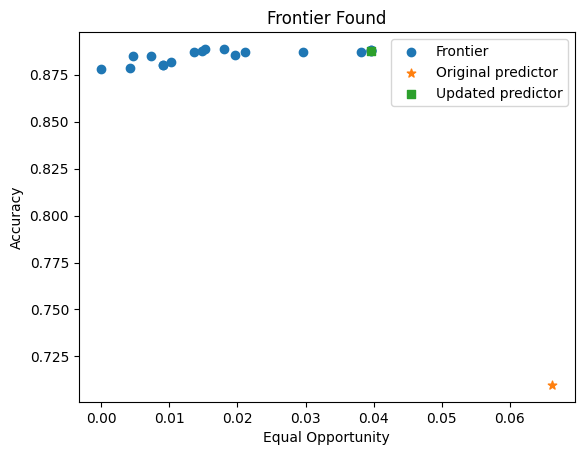

In [7]:
figure = fpred.plot_frontier(test_dict)

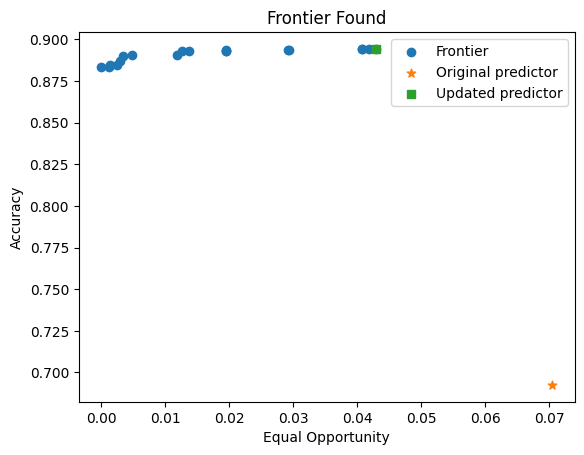

In [8]:
fpred.plot_frontier()